https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook

Movie recommendation system based on filtering using TMDB 5000 Movie Dataset. 

Three types of recommender systems -
1) Demographic filtering - use movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. The basic idea of this is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the avg audience.

2) Content Based Filtering - suggest similar items based on a particular item. This sytem uses item metadata such as genre, director, description, actors, etc.

3) Collaborative Filtering - This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.


Load the data

In [1]:
import pandas as pd
import numpy as np
df1=pd.read_csv('/Users/diane/Desktop/Project/Build a recommnedation system/Datasets/archive (7)/tmdb_5000_credits.csv')
df2=pd.read_csv('/Users/diane/Desktop/Project/Build a recommnedation system/Datasets/archive (7)/tmdb_5000_movies.csv')

In [2]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Dataset contains : 1) a unique identifier for each movie 2) cast : lead and supporting actors 3) crew : director, editor, composer, writer etc.

In [3]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


df2) popularity : a numeric quantity specifying the movie popularity. 

join the two dataset on the 'id' column

In [4]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [5]:
df1.columns = ['id','title','cast','crew']
df2 = df2.merge(df1, on ='id')

In [6]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Demogrpahic Filtering -

#### we need a metric to score or rate movie -> calc the score for every movie -> sort the scores and recommend the best rated movie to the users.

Weighted Rating (WR) = (v/v+m * R) + (m/v+m * C)
1) v : number of votes for the movie
2) m : min votes required to be listed in the chart
3) r : avg rating of the movie
4) c : mean vote across the whole report

In [7]:
C = df2['vote_average'].mean()
C

6.092171559442011

the mean rating for all the movies is approx. 6 on a scale of 10. 
So, what is a value for m ? 
We will use 90th percentile as our cutoff. In which case, for a movie to feature in the chart, it must have more votes than at least 90% of the movies in the list.

In [8]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [9]:
q_movies = df2.copy().loc[df2['vote_count']>=m]
q_movies.shape

(481, 23)

In [10]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R)+(m/(v+m)*C)

In [11]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [12]:
q_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew', 'score'],
      dtype='object')

In [13]:
q_movies.rename(columns={'title_x': 'title'}, inplace=True)

In [14]:
q_movies.drop('title_y', axis=1, inplace=True)

In [15]:
q_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew', 'score'],
      dtype='object')

In [16]:
# sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)


# print the top 15 movies
q_movies[['title','vote_count','vote_average','score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [17]:
df2.rename(columns={'title_x': 'title'}, inplace=True)
df2.drop('title_y', axis=1, inplace=True)

Text(0.5, 1.0, 'Popular Movies')

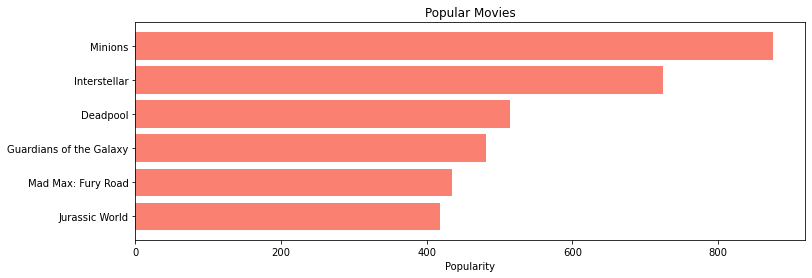

In [18]:
pop = df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center', color='salmon')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Remember that this popularity is not specific to any interests or taste to particular users. We will refine this when we move onto the content based filtering.

## Content Based Filtering 

In this filtering, we will use the content of the movie such as overview, cast, crew, keyword, tagline etc. to find its similarity with other movies. 

## Plot Description Based Recommender

###### we will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset. 

In [19]:
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

text convert -> we will compute Term Frequency-Inverse Document Frequency vectors for each overview.
So, this will give you a matrix where each column represents a word in the overview voca and each row represents a movie. This is done to reduce the importance of words that occure frequently in plot overviews and therefore, their significance in computing the final similarity score. 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the','a'
tfidf = TfidfVectorizer(stop_words = 'english')

# replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

# construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [22]:
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

we see that over 20,000 different words were used to describe the 4800 movies in our dataset.
With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

### Cosine Similarity

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we wil use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [23]:
# Import linear-kernel
from sklearn.metrics.pairwise import linear_kernel

# compute the cosine similarity matrix
cosine_sim=linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
# construct a reverse map of indices and movie titles
# we are giving the index of a movie given its title. 
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [25]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [26]:
# function that takes in movie title as an input and outputs most similar movies

def get_recommendations(title, cosine_sim=cosine_sim):
    # get the index of the movie that mathces the title
    idx = indices[title]
    
    # get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # get the scores of the 10 most siimilar movies
    sim_scores = sim_scores[1:11]
    
    # get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [27]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [28]:
get_recommendations('Plastic')

2923                          St. Trinian's
4268    Lock, Stock and Two Smoking Barrels
2027                               I Am Sam
16                             The Avengers
2212                               Triple 9
1339                            Blue Streak
4124                     This Thing of Ours
39                             TRON: Legacy
4391                       The Perfect Host
3705                        Moms' Night Out
Name: title, dtype: object

This recommendation system is not that great as "The Dark Knight Rises" brings all Batman series. It is more likely that people who liked this movie is more preferring to enjoy movies with Christoper Nolan.

## Credits, Genres and Keywords Based Recommender

we are going to build a recommender based on the following metadata : the top 3 actors, the direcor, related genres and the movie plot keywords. 

In [29]:
from ast import literal_eval

features = ['cast','crew','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

next, we'll write functions that will help us to extract the required info from each feature

In [30]:
df2.crew[0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [31]:
# director's name from the crew. if it's not listesd, return NaN

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [32]:
# top 3 elements or entire list: whichever is more. -- this is for cast, keywords, genre
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) >3 :
            names = names[:3] # return only first 3 names if more than 3 names exist
        return names
    
    return[] # return empty list in case of missing data



In [33]:
# have a new director feature
df2['director'] = df2['crew'].apply(get_director)

features = ['cast','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [34]:
df2[['title','cast','director','keywords','genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [35]:
# function to convert all strings to lower case and eliminate spaces

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        # this is for director as it's not list
        if isinstance(x, str):
            return str.lower(x.replace(" ",""))
        else:
            return ''

In [36]:
# apply ^ functin to features

features = ['cast','keywords','director','genres']

for feature in features:
    df2[feature] =df2[feature].apply(clean_data)

In [37]:
# add a new feature of a string that contains all the metadata that needs to be converted into vectorizer

def create_soup(x):
    return ' '.join(x['keywords'])+ ' ' + ' '.join(x['cast']) + ' '+x['director'] + ' '+' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [38]:
df2['soup'][0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy'

we will use the CountVectorizer() instead of TF-IDF because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

count= CountVectorizer(stop_words ='english')
count_matrix =count.fit_transform(df2['soup'])


In [40]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

Let's reset index of our main df and construct reverse mapping as before

In [41]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,soup
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...
3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,dccomics crimefighter terrorist christianbale ...
4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...


In [42]:
df2=df2.reset_index()

In [43]:
df2.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...


In [44]:
indices = pd.Series(df2.index, index=df2['title'])

In [45]:
df2.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...


In [46]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

Our recommendr has been more successful having more infomation due to more metadata had has given better recommendation for us. But, our content based filtering has some limitations. It's only capable of suggesting movies which are close to a certain movie. It's not capable of capturing tastes and providing recommendations across genres. Anyone using our recommendation system based on a movie will have same movies results regardless of their tastes or biases. 

## Collaborative Filtering

The basic concept of collaborative filtering is to answer to a question like what contents should we recommend to user A based on ratings/ review of each contents from each user? 
For example, if we had more similarity with user B then user C based on each rating, we could calculate possible rating from weighted average/ rating. 

But still we have 3 big barriers in collaborative filtering.
1) sparsity:<br> 
    not many people give ratings/review. So we have too many blanks.<br>
2) scalability:<br>
    in real word, the data will be too heavy so the computation will grow a lot. The worst case complexity is O(mn) with m users and n items.<br>
3) gray sheep / black sheep:<br>
    for example, there is a blue cluster and red cluster but ours is neither A nor B. It's on the bolder line.<br> 

We want to handle these issues by applying latent factor. - It is an idea that describes a property or a concept that a user or an item have. For example, for music, latent factor can refer to what genre music is belonging to. So, it's decreasing the dimension of utility matrix by extracting it's latent factors. Therefore, we map each user and each item into a latent space with dimension r. 

We will load different dataset from what we loaded because it doesn't have userID. 

In [47]:
df3 = pd.read_csv("/Users/diane/Desktop/Project/Build a recommnedation system/Datasets/archive (8)/ratings_small.csv")

In [48]:
df3.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [49]:
pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.0.0
alabaster                          0.7.12
altair                             4.1.0
altgraph                           0.17.2
anaconda-client                    1.9.0
anaconda-navigator                 2.1.0
anaconda-project                   0.10.2
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              

Note: you may need to restart the kernel to use updated packages.


We will use surprise library as it's developed based on scikit to build a recommender system using explicit rating data. Before the modeling part, we need to convert our dataset into a Dataset object from surprise library. In order to do this, we also need to define a Reader object to be able to parse the Dataframe.  

In [2]:
# We will import surprise to implement SVD (latent factor)
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import pandas as pd
import numpy as np
reader = Reader() # 
ratings =pd.read_csv("/Users/diane/Desktop/Project/Build a recommnedation system/Datasets/archive (8)/ratings.csv")
movies =pd.read_csv("/Users/diane/Desktop/Project/Build a recommnedation system/Datasets/archive (8)/movies_metadata.csv")
ratings.head()

/Users/diane/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [51]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Modeling and Evaluation

In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
results=cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5)

In [ ]:
results

In [ ]:
print("Average MAE: ", np.average(results["test_mae"]))
print("Average RMSE: ", np.average(results["test_rmse"]))

### Hyperparameter Tuning

We could use grid search cross-validation in hyperparameter tuning to improve the results.

In [ ]:
from surprise.model_selection import GridSearchCV
 
param_grid = {
  'n_factors': [20, 50, 100],
  'n_epochs': [5, 10, 20]
}
 
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=10)
gs.fit(data)
 
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

In [ ]:
from surprise.model_selection import train_test_split
 
# best hyperparameters
best_factor = gs.best_params['rmse']['n_factors']
best_epoch = gs.best_params['rmse']['n_epochs']
 
# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)
 
# We'll use the famous SVD algorithm.
svd = SVD(n_factors=best_factor, n_epochs=best_epoch)
 
# Train the algorithm on the trainset
svd.fit(trainset)

### Recommending movies

First, we have to find a list of the movies that a particual user has not seen. Afterward, we can predict each interaction that's missing using the model. 

In [ ]:
def generate_recommendation(model, user_id, ratings_df, movies_df, n_items):
   # Get a list of all movie IDs from dataset
    movie_ids = ratings["movieId"].unique()
 
   # Get a list of all movie IDs that have been watched by user
    movie_ids_watched = ratings.loc[ratings["userId"] == user_id, "movieId"]
    # Get a list off all movie IDS that that have not been watched by user
    movie_ids_to_pred = np.setdiff1d(movie_ids, movie_ids_watched) # setdiff1d(a1,a2): return values that are in a1 not in a2. 
 
   # Apply a rating of 4 to all interactions (only to match the Surprise dataset format)
    test_set = [[user_id, movie_id, 4] for movie_id in movie_ids_to_pred]
 
   # Predict the ratings and generate recommendations
    predictions = model.test(test_set)
    pred_ratings = np.array([pred.est for pred in predictions])
    print(pred_ratings)
    print("Top {0} item recommendations for user {1}:".format(n_items, user_id))
    #Rank top-n movies based on the predicted ratings
    index_max = (-pred_ratings).argsort()[:n_items] #argsort() means to sort the elements of an array with the given axis of the same shape.
    for i in index_max:
        movie_id = movie_ids_to_pred[i]
        #print(movie_id)
        print(movies_df[movies_df["id"]==movie_id])
        
        #print(movies_df[movies_df["id"]==movie_id]["original_title"].values[0], pred_ratings[i])
 
 
# define which user ID that we want to give recommendation
userID = 23
# define how many top-n movies that we want to recommend
n_items = 10
# generate recommendation using the model that we have trained
generate_recommendation(svd,userID,ratings,movies,n_items)

In [ ]:
pred_ratings = np.array([pred.est for pred in predictions])
    print(pred_ratings)
    print("Top {0} item recommendations for user {1}:".format(n_items, user_id))
    #Rank top-n movies based on the predicted ratings
    index_max = (-pred_ratings).argsort()[:n_items] #argsort() means to sort the elements of an array with the given axis of the same shape.
    index_max2 = (pred_ratings).argsort()[:n_items]
    print(index_max)

In [ ]:
arr = np.array([2, 1, 5, 3, 7, 4, 6, 8])

In [ ]:
arr

In [ ]:
-arr

In [ ]:
arr.argsort()

In [ ]:
arr.argsort()[:3]

In [ ]:
-arr.argsort()[:3]

In [ ]:
movies

In [ ]:
ratings.loc[ratings['movieId'] == 862]

In [ ]:
ratings